<a href="https://colab.research.google.com/github/majidsoorani/CS-SBU-DataMining-Msc-projects/blob/main/MajidSoorani-99422111/Project1/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json


Saving AB_NYC_2019.csv to AB_NYC_2019.csv


{'AB_NYC_2019.csv': b'id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365\n2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365\n2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355\n3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,,,1,365\n3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194\n5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0\n5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.975,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("/content/AB_NYC_2019.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [ ]:
data.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


```
# Ex : when we looking for head of data we can say say avg availability in class is 365

```

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
availability_365_mean = np.mean(data.availability_365)
print(availability_365_mean)
tset, pval = ttest_1samp(data.availability_365, 365)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

112.78132733408324
p-values 0.18932046162560442
we are accepting null hypothesis


But It's not true , and Our assume are rehjected.

Ex : we say avg avilibily in class is 365

```
# This is formatted as code
```

 but price in location is diffrent .

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
price_mean = np.mean(data.price)
print(price_mean)
tset, pval = ttest_1samp(data.price, 150)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

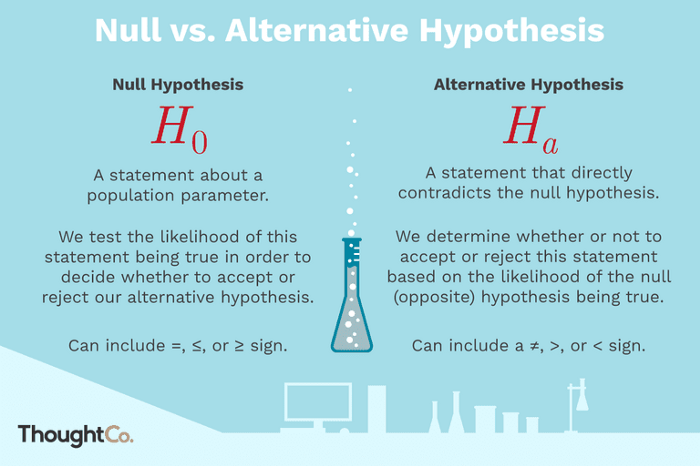

# **Example : a host revirewes avvarage is !=2 per every host etc.**

# **Level of significance: Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.**

# **Type I error:** When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

# **Type II errors:** When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

In [ ]:
data.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()  
data["room_type_code"] = ord_enc.fit_transform(data[["room_type"]])
data["neighbourhood_group_code"] = ord_enc.fit_transform(data[["neighbourhood_group"]])


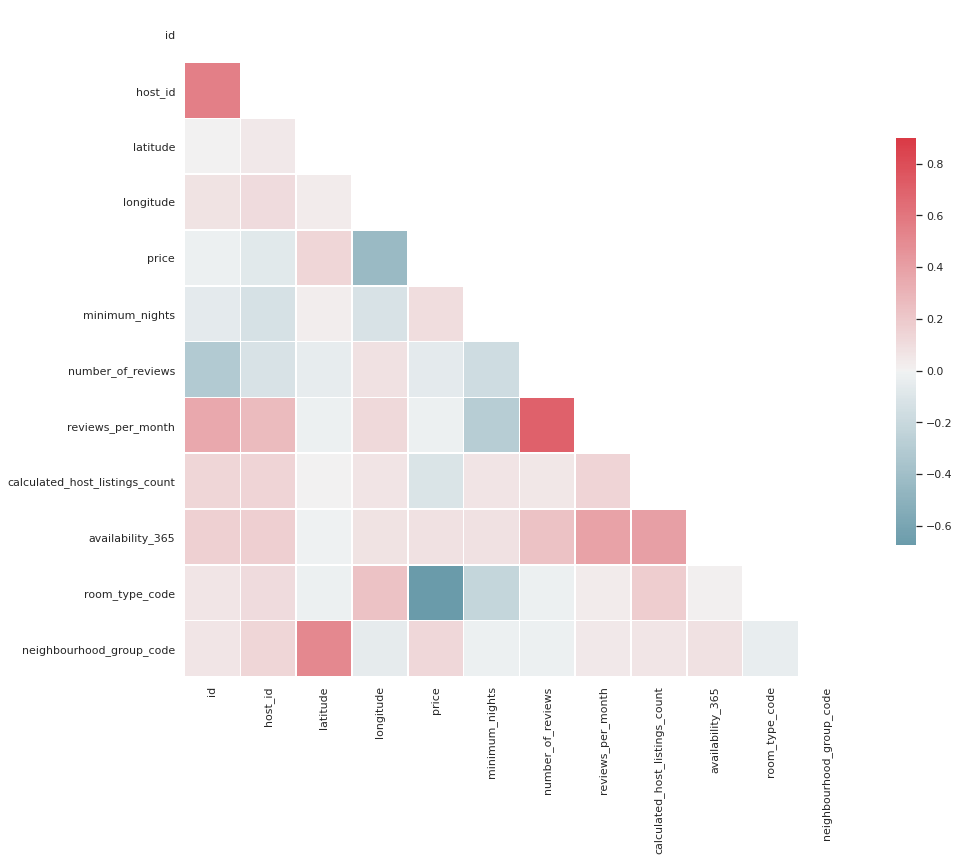

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#data['equal'] = np.where(data['SOURCE_PROFILE_ID'] == data['TARGET_PROFILE_ID']  ,1, 0)
analytics_fields = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
##data1 = obj_df[analytics_fields]
cols = data.columns.tolist()

sns.set(style="white")
#
# Compute the correlation matrix
corr = data.corr(method = 'spearman', min_periods = 1)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure hip
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



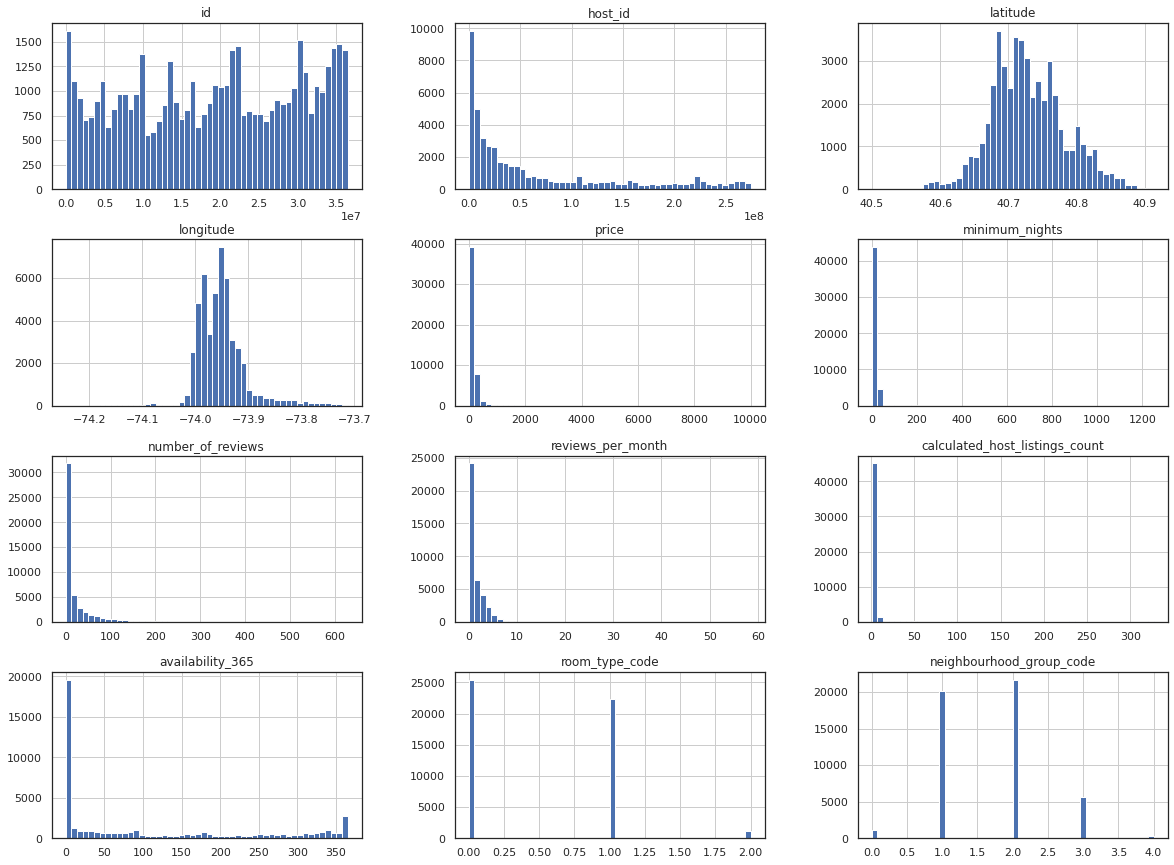

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f5de58978>,
      dtype=object)

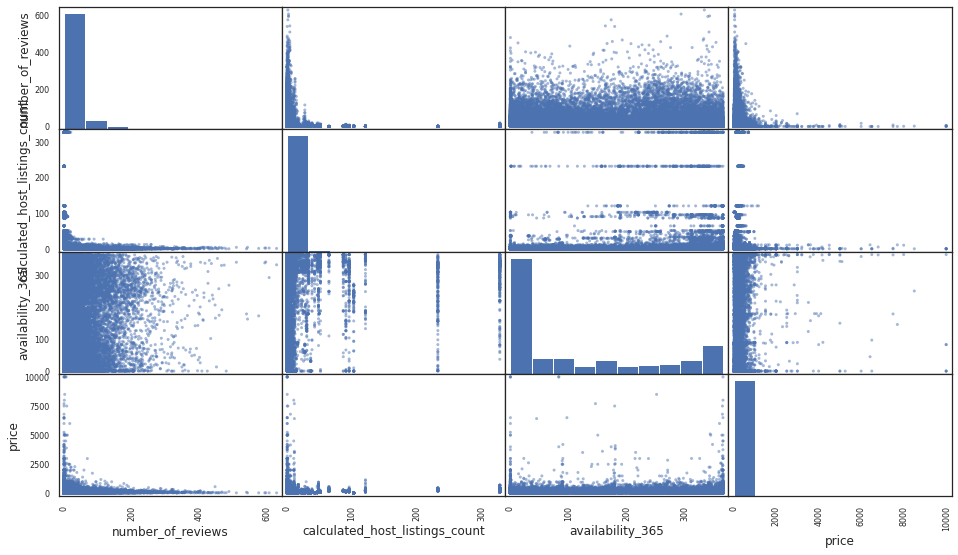

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["neighbourhood_group", "room_type",'number_of_reviews','calculated_host_listings_count', 'availability_365',"price"]
scatter_matrix(data[attributes], figsize=(16, 9))

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


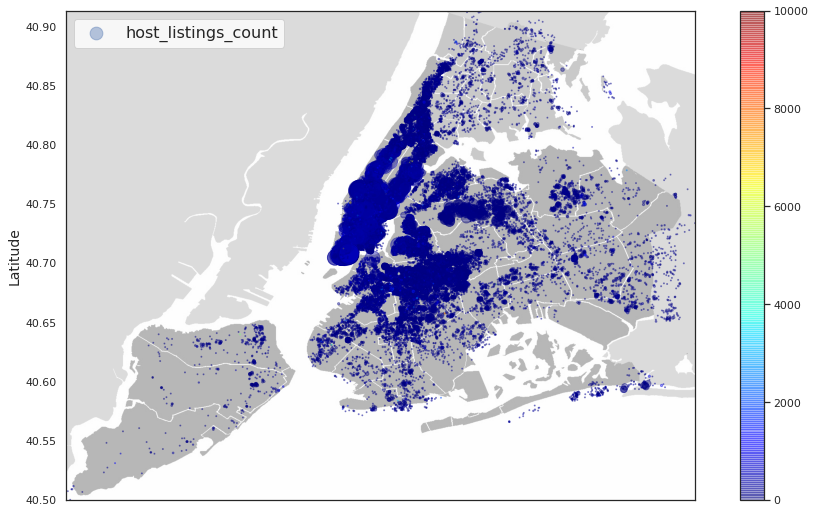

In [ ]:
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

img = Image.open('/content/New_York_City_.png')  

ax = data.plot(kind="scatter", x="longitude", y="latitude", figsize=(16,9),
                       s=data['calculated_host_listings_count'], label="host_listings_count",
                       color=data["price"], cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                      )
plt.imshow(img,  alpha=0.5,extent=[-74.244420,-73.712990,40.499790,40.913060],
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

BoroCode  ...         Ave
0         5  ...  114.812332
1         4  ...   99.517649
2         3  ...  124.383207
3         1  ...  196.875814
4         2  ...   87.496792

[5 rows x 6 columns]

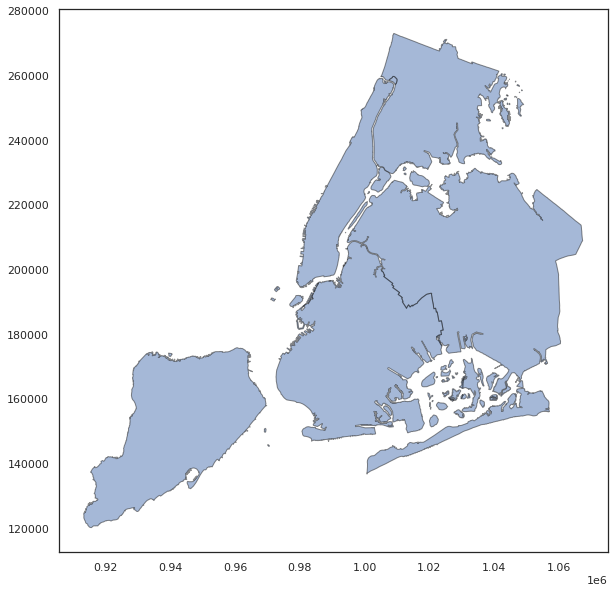

In [ ]:
##!pip install geopandas
## boardline for neighbourhood_group 
import geopandas as gpd
df =  gpd.read_file(gpd.datasets.get_path('nybb'))
ax = df.plot(figsize = (10,10),alpha = 0.5,edgecolor = 'k')
##plt.grid(b=True, which='major', color='#666666', linestyle='-')
##df
average = data[['neighbourhood_group','price']].groupby('neighbourhood_group').mean().reset_index()
average.rename(columns={'price':"Ave"},inplace =True)
average.rename(columns={'neighbourhood_group':"BoroName"},inplace =True)
df = df.merge(average,on = 'BoroName' )
df

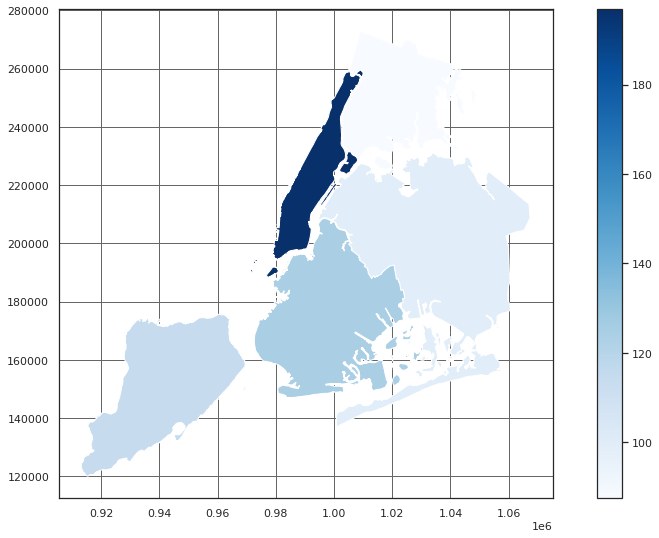

In [ ]:
### The average price of airbnb in each neighbourhood_group: Manhattan has the highest value
import matplotlib.pyplot as plot
fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,9)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
df.plot(column = 'Ave',cmap = 'Blues', ax =ax,legend = True)

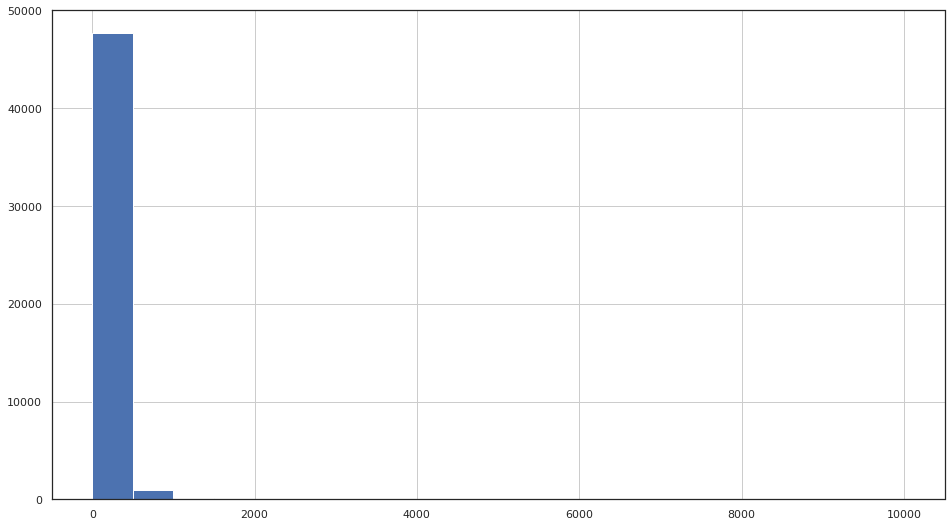

In [ ]:
##
data['price'].hist(figsize =(16,9),bins = 20)

In [ ]:
## since most of airbnb is lower than 2000, I only select price from 0-100. 
import numpy as np
a = np.arange(data['price'].min(),data['price'].max()+2000,1000).tolist()
b = np.arange(0,11,1)
resultA = pd.DataFrame({'label':b})
data['priceType'] = pd.cut(data['price'],bins = a,labels =b )
resultA['range'] = a[:-1]
resultA['num'] = data['priceType'].value_counts()
resultA['percentage'] = pd.DataFrame(data['priceType'].value_counts()/data['priceType'].count())

resultA

label  range    num  percentage
0       0      0  48645    0.995111
1       1   1000    153    0.003130
2       2   2000     41    0.000839
3       3   3000     13    0.000266
4       4   4000     12    0.000245
5       5   5000      4    0.000082
6       6   6000      5    0.000102
7       7   7000      4    0.000082
8       8   8000      1    0.000020
9       9   9000      6    0.000123
10     10  10000      0    0.000000

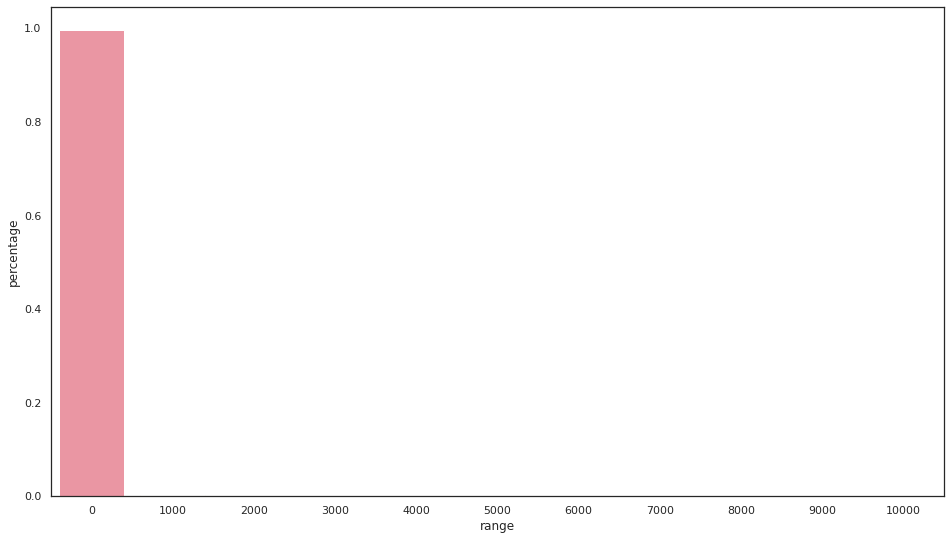

In [ ]:
import seaborn as sns
f,ax =plt.subplots(figsize =(16,9))
sns.barplot(x = resultA['range'],y = resultA['percentage'])

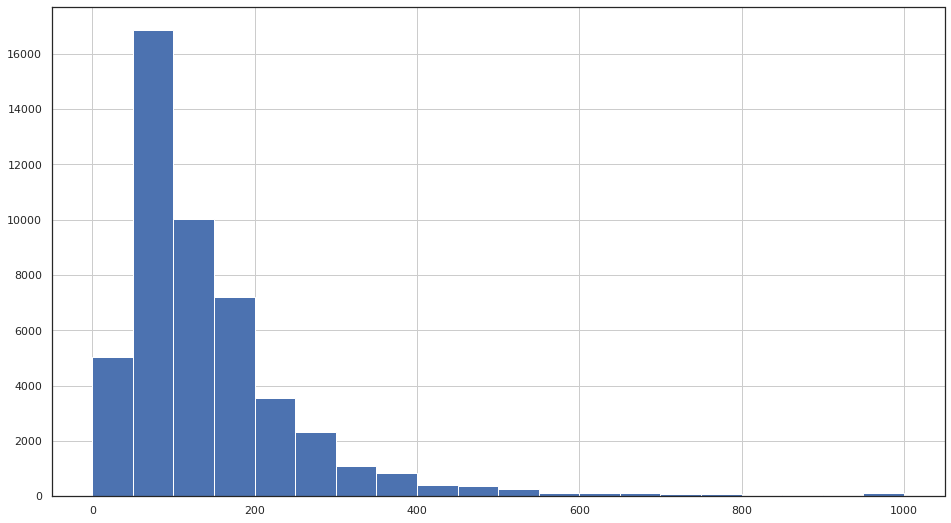

In [ ]:
## since most of airbnb is lower than 2000, I only select price from 0-600. 
airSub = data.loc[data['price'] <=1000]
airSub['price'].hist(figsize =(16,9),bins = 20)

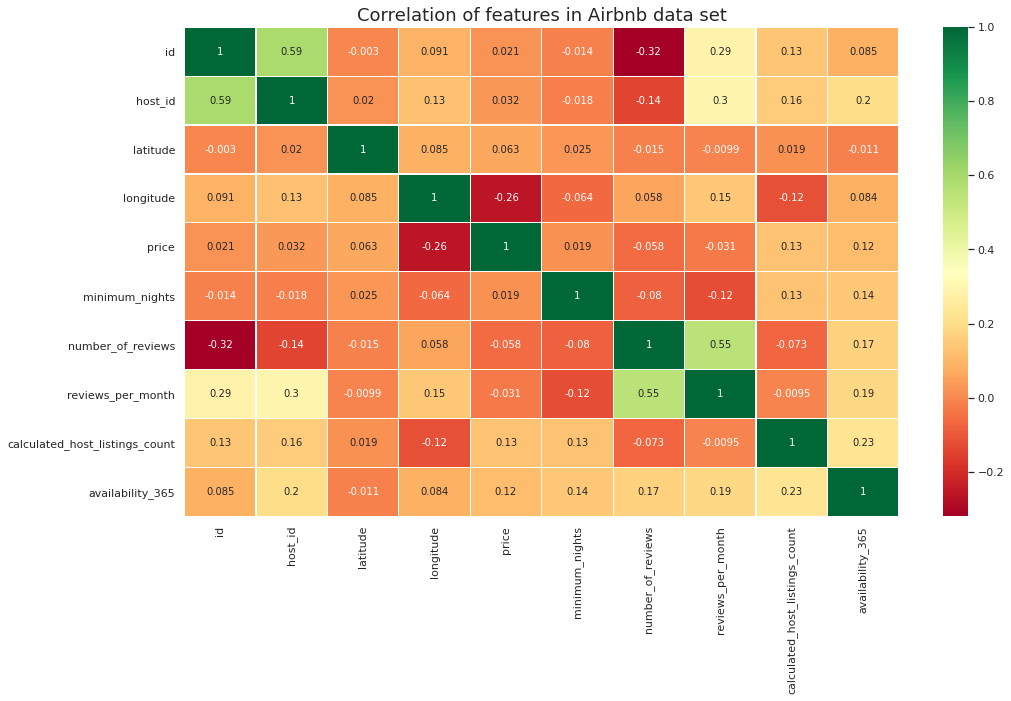

In [ ]:
## correlationship for each features
corr = airSub.corr()
plt.figure(figsize= (16,9))
plt.title('Correlation of features in Airbnb data set',fontsize =18)
sns.heatmap(corr,annot = True, cmap ='RdYlGn',linewidths = 0.2, annot_kws ={'size':10})
plt.show()

In [ ]:
## 1.drop some unrelated features: name,host_name,id,last_review,host_id 
airbnbFull = airSub.drop(['name','host_name','id','last_review','host_id','priceType'],axis =1)
airbnbFull.head()

neighbourhood_group  ... availability_365
0            Brooklyn  ...              365
1           Manhattan  ...              355
2           Manhattan  ...              365
3            Brooklyn  ...              194
4           Manhattan  ...                0

[5 rows x 11 columns]